In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


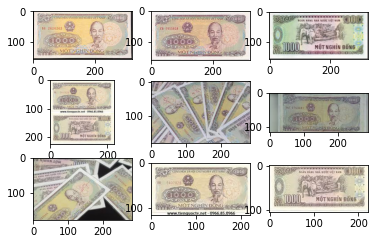

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/AI/Money/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'1k_00'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/AI/Money/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('1k'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2k'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5k'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10k'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20k'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50k'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100k'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(78, 200, 200, 3) (78,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten 
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
 history = model.fit(photos, labels, epochs=10, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 70ms/step - loss: 1152.0132 - accuracy: 0.0897
Epoch 2/10
3/3 [==============================] - 0s 64ms/step - loss: 755.4401 - accuracy: 0.3077
Epoch 3/10
3/3 [==============================] - 0s 58ms/step - loss: 160.1107 - accuracy: 0.2564
Epoch 4/10
3/3 [==============================] - 0s 58ms/step - loss: 30.9698 - accuracy: 0.4744
Epoch 5/10
3/3 [==============================] - 0s 58ms/step - loss: 3.3759 - accuracy: 0.8077
Epoch 6/10
3/3 [==============================] - 0s 57ms/step - loss: 1.0514 - accuracy: 0.8590
Epoch 7/10
3/3 [==============================] - 0s 57ms/step - loss: 0.1660 - accuracy: 0.9487
Epoch 8/10
3/3 [==============================] - 0s 54ms/step - loss: 0.1056 - accuracy: 0.9615
Epoch 9/10
3/3 [==============================] - 0s 60ms/step - loss: 0.0198 - accuracy: 0.9872
Epoch 10/10
3/3 [==============================] - 0s 56ms/step - loss: 0.0044 - accuracy: 1.0000


In [21]:
model.evaluate(photos,labels)

3/3 [==============================] - 0s 33ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0014397818595170975, 1.0]

In [10]:
model.save('money_Train.h5')

In [ ]:
from keras.models import load_model
#models=load_model('11TienGiay_Final.h5')

In [11]:
classes = ["1k","2k","5k","10k","20k","50k"]

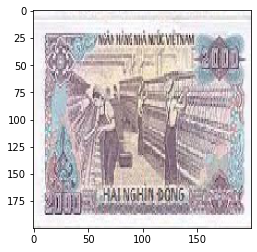

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('2k.jpg', target_size=(200,200))
plt.imshow(img)

In [30]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.0953643  0.10068934 0.09211581 0.08817089 0.0922182  0.09105217
  0.09210389 0.09015106 0.08788677 0.0818352  0.08841228]]


'2k'